In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("/content/train.csv")

In [3]:
# Display basic information
df_info = df.info()
df_head = df.head()
df_desc = df.describe()

df_info, df_head, df_desc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28800 entries, 0 to 28799
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      28800 non-null  int64  
 1   dri_score               28646 non-null  object 
 2   psych_disturb           26738 non-null  object 
 3   cyto_score              20732 non-null  object 
 4   diabetes                26681 non-null  object 
 5   hla_match_c_high        24180 non-null  float64
 6   hla_high_res_8          22971 non-null  float64
 7   tbi_status              28800 non-null  object 
 8   arrhythmia              26598 non-null  object 
 9   hla_low_res_6           25530 non-null  float64
 10  graft_type              28800 non-null  object 
 11  vent_hist               28541 non-null  object 
 12  renal_issue             26885 non-null  object 
 13  pulm_severe             26665 non-null  object 
 14  prim_disease_hct        28800 non-null

(None,
    ID                       dri_score psych_disturb    cyto_score diabetes  \
 0   0  N/A - non-malignant indication            No           NaN       No   
 1   1                    Intermediate            No  Intermediate       No   
 2   2  N/A - non-malignant indication            No           NaN       No   
 3   3                            High            No  Intermediate       No   
 4   4                            High            No           NaN       No   
 
    hla_match_c_high  hla_high_res_8          tbi_status arrhythmia  \
 0               NaN             NaN              No TBI         No   
 1               2.0             8.0  TBI +- Other, >cGy         No   
 2               2.0             8.0              No TBI         No   
 3               2.0             8.0              No TBI         No   
 4               2.0             8.0              No TBI         No   
 
    hla_low_res_6  ...          tce_div_match donor_related  \
 0            6.0  ...    

In [4]:
# Checking missing values in each column
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Filtering columns with missing values
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)

missing_data

,Missing Values,Percentage
tce_match,18996,65.958333
mrd_hct,16597,57.628472
cyto_score_detail,11923,41.399306
tce_div_match,11396,39.569444
tce_imm_match,11133,38.656250
cyto_score,8068,28.013889
hla_high_res_10,7163,24.871528
hla_high_res_8,5829,20.239583
hla_high_res_6,5284,18.347222
hla_match_dqb1_high,5199,18.052083


In [5]:
# Drop columns with more than 50% missing values
threshold = 50  # Percentage threshold
columns_to_drop = missing_data[missing_data['Percentage'] > threshold].index
df_cleaned = df.drop(columns=columns_to_drop)

# Fill numeric missing values with median
num_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_cleaned[num_cols] = df_cleaned[num_cols].apply(lambda x: x.fillna(x.median()))

# Fill categorical missing values with mode
cat_cols = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned[cat_cols] = df_cleaned[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Checking if missing values are handled
df_cleaned.isnull().sum().sum()  # Should return 0 if all missing values are handled


0

In [6]:
# Step 3: Removing Duplicates
duplicates_before = df_cleaned.duplicated().sum()
df_cleaned = df_cleaned.drop_duplicates()
duplicates_after = df_cleaned.duplicated().sum()

duplicates_before, duplicates_after

(0, 0)

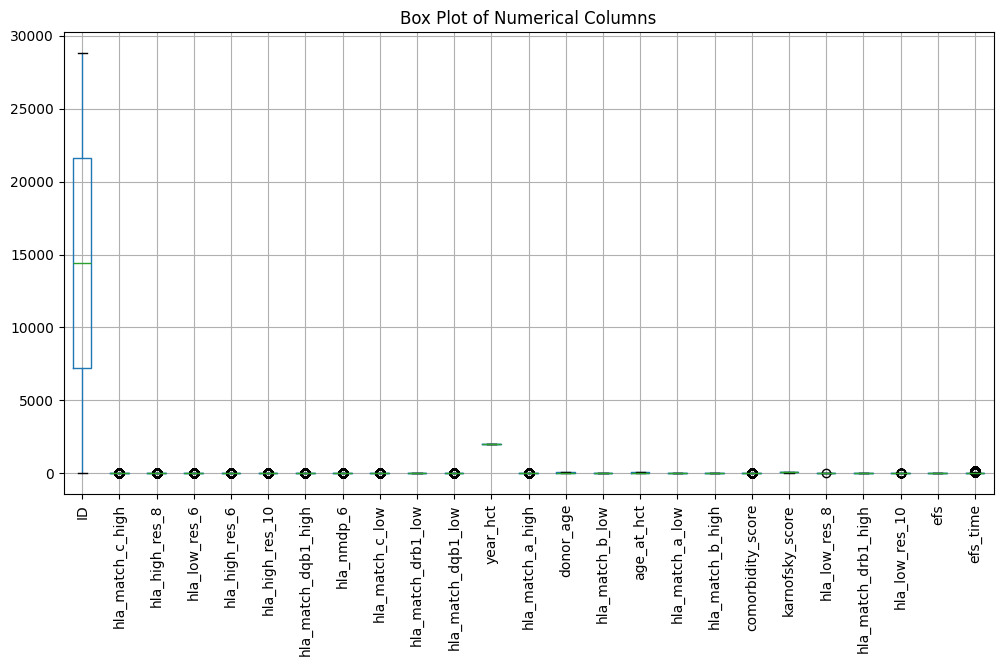

In [8]:
# Step 4: Outlier Detection using Boxplots

# Selecting numerical columns for visualization
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Plotting boxplots for numerical columns to detect outliers
plt.figure(figsize=(12, 6))
df_cleaned[numeric_cols].boxplot(rot=45)
plt.title('Box Plot of Numerical Columns')
plt.xticks(rotation=90)
plt.show()

In [9]:
# Step 4: Outlier Treatment using IQR Method

# Function to remove outliers using IQR
def remove_outliers_iqr(df, numeric_cols):
    Q1 = df[numeric_cols].quantile(0.25)
    Q3 = df[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Removing outliers
    df_outliers_removed = df[~((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).any(axis=1)]
    return df_outliers_removed

# Applying the function to remove outliers
df_cleaned = remove_outliers_iqr(df_cleaned, numeric_cols)

# Checking new shape after outlier removal
df_cleaned.shape

(15667, 58)

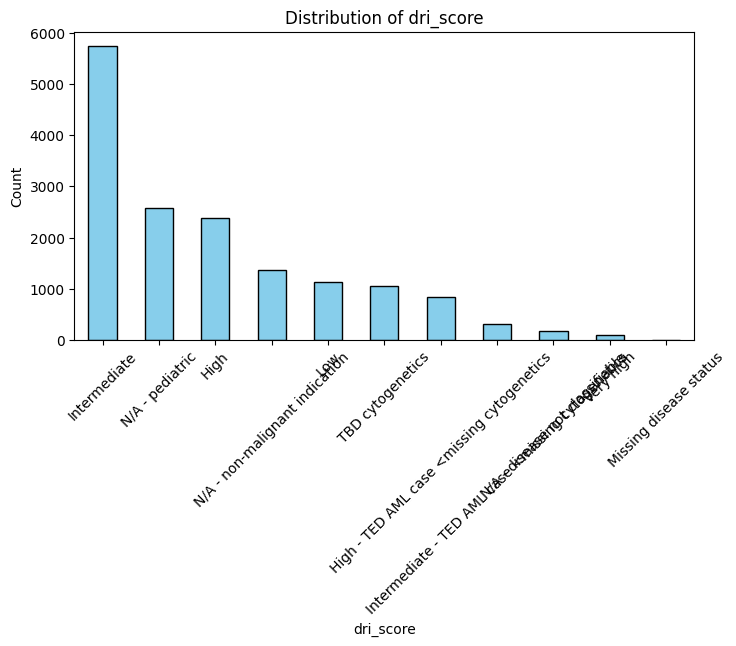

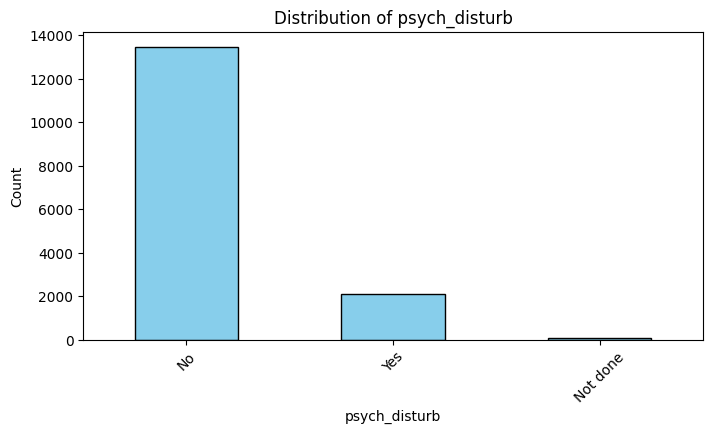

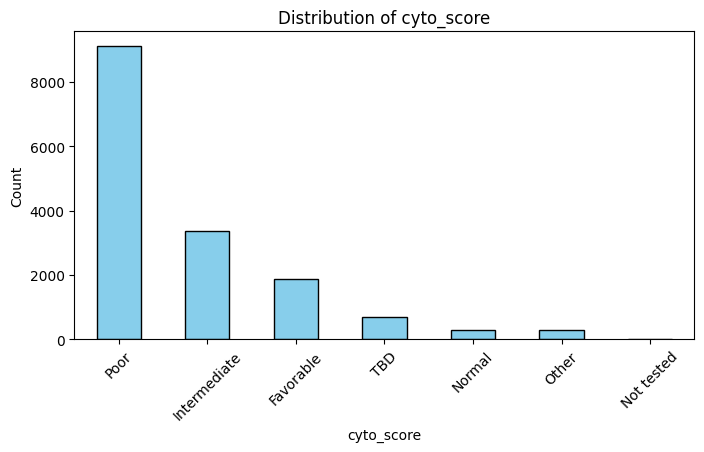

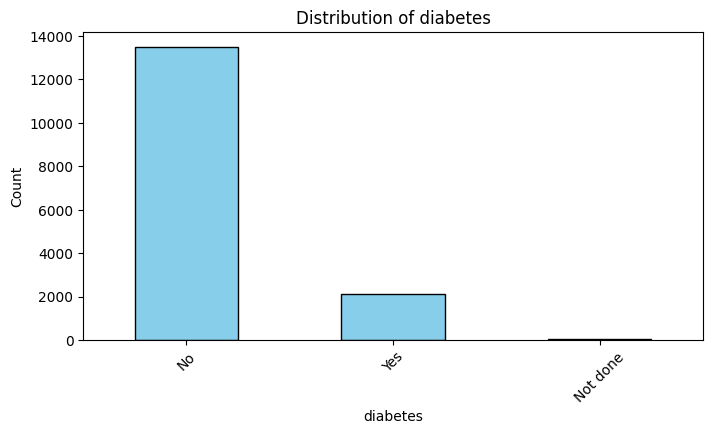

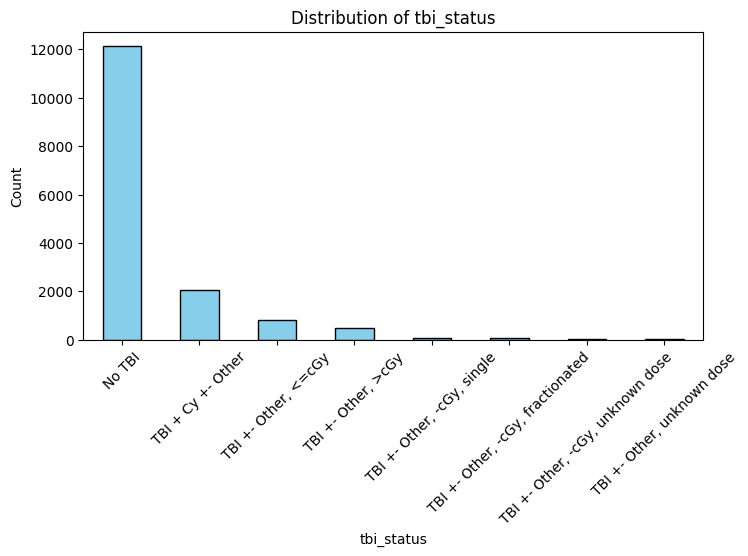

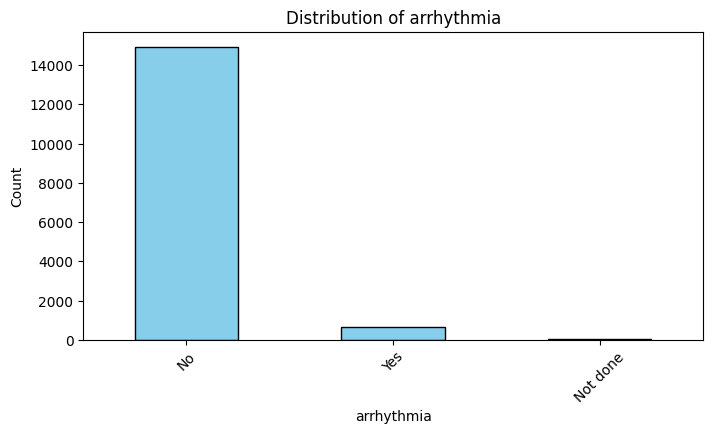

In [10]:
# Step 5: Categorical Data Visualization

# Selecting categorical columns
cat_cols = df_cleaned.select_dtypes(include=['object']).columns

# Plotting bar charts for categorical columns
for col in cat_cols[:6]:  # Limiting to first 6 for better visualization
    plt.figure(figsize=(8, 4))
    df_cleaned[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

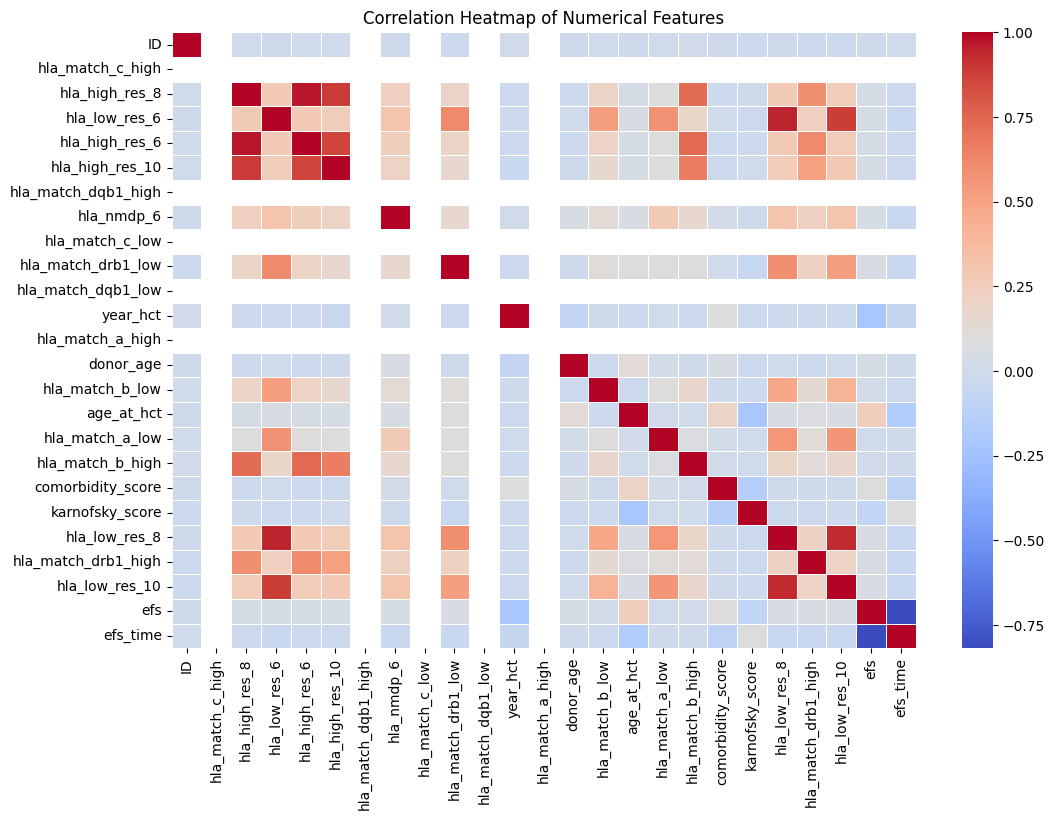

In [11]:
# Step 6: Exploratory Data Analysis (EDA) - Correlation Heatmap

# Compute correlation matrix for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned[numeric_cols].corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
target_column = 'efs_time'
features = df_cleaned.select_dtypes(include=[np.number]).drop(columns=[target_column], errors='ignore')
target = df_cleaned[target_column]

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions & evaluation
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 103.20575076931674
R² Score: 0.7300084363032426
